Small example of how to estimatie $\pi$ from random numbers.

---
First load `numpy` and `matplotlib` for the needed functionality

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Javascript
import IPython

Choose the number of trials to be made

In [5]:
num_trials=10000

Now create `num_trials` number of points $\vec{p}=(p_x,p_y)$ from random numbers using `numpy.random.rand()` and then calculate the distance to origo, $d=|\vec{p}|$, for all points. The random numbers spanning $p_x$ and $p_y$ are on the interval $(-1,1)$ so that $|\vec{r}|$ is within the interval $(0,\sqrt{2})$. 

In [6]:
trial_x=np.random.rand(num_trials)*2.0-1
trial_y=np.random.rand(num_trials)*2.0-1
dist=trial_x**2+trial_y**2

The area spanned by the random number box is $A_b=l \times l=l^2$ while the area of the circle inscribed within the box is $A_c=\pi \times r^2=\pi l^2/4$

The fraction, $f$ of the number of points that fall within the unit circle versus the total number of trials should then approach $f=A_c/A_b=\pi/4$. So multiplying the calculated fraction $f$ with $4$ we get an estimate of $\pi=4f$.

In [7]:
inside=dist[dist<=1.0].shape[0]
outside=dist[dist>1.0].shape[0]
print('Number of trial points:',num_trials)
print('Number of points inside:',inside)
print('Fraction of inscribed points, f:',inside/num_trials)
print('Estimate of π=',4.0*inside/num_trials)

Number of trial points: 10000
Number of points inside: 7876
Fraction of inscribed points, f: 0.7876
Estimate of π= 3.1504


---
Let's also illustrate the procedure with a figure below.

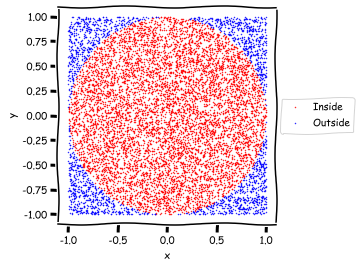

In [8]:
# Just load the xkcd presets first
plt.xkcd()

fig,ax=plt.subplots()
plt.scatter(trial_x[dist<=1.0],trial_y[dist<=1.0],c='red',s=0.2,label='Inside')
plt.scatter(trial_x[dist>1.0],trial_y[dist>1.0],c='blue',s=0.2,label='Outside')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=3)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_aspect('equal')


plt.show()

We can combine the steps above to make a simple animation (obtained by re-running the cell below)

In [136]:
num_trials=100

tot_trials=0
all_in_x=np.array([])
all_in_y=np.array([])
all_out_x=np.array([])
all_out_y=np.array([])

Number of trial points: 100
Number of points inside: 83
Fraction of inscribed points, f:0.83000000
Estimate of π=3.32000000
Error:0.17840735


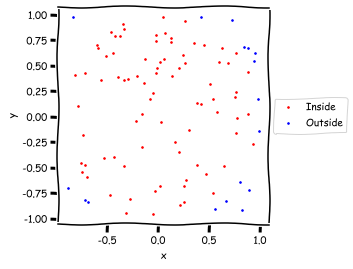

In [137]:
fig,ax=plt.subplots()

trial_x=np.random.rand(num_trials)*2.0-1
trial_y=np.random.rand(num_trials)*2.0-1
dist=trial_x**2+trial_y**2

inside=dist[dist<=1.0].shape[0]
outside=dist[dist>1.0].shape[0]
tot_trials=tot_trials+num_trials

all_in_x=np.hstack([all_in_x, trial_x[dist<=1.0]]) if all_in_x.size else trial_x[dist<=1.0]
all_in_y=np.hstack([all_in_y, trial_y[dist<=1.0]]) if all_in_y.size else trial_y[dist<=1.0]
all_out_x=np.hstack([all_out_x, trial_x[dist>1.0]]) if all_out_x.size else trial_x[dist>1.0]
all_out_y=np.hstack([all_out_y, trial_y[dist>1.0]]) if all_out_y.size else trial_y[dist>1.0]

print('Number of trial points:',tot_trials)
print('Number of points inside:',all_in_x.shape[0])
in_frac=all_in_x.shape[0]/tot_trials
print(f'Fraction of inscribed points, f:{in_frac:.8f}',)
pi_est=4.0*all_in_x.shape[0]/tot_trials
print(f"Estimate of π={pi_est:.8f}")
err=np.sqrt((pi_est-np.pi)**2)
print(f"Error:{err:.8f}")
#plt.scatter(trial_x[dist<=1.0],trial_y[dist<=1.0],c='red',s=0.5,label='Inside')
#plt.scatter(trial_x[dist>1.0],trial_y[dist>1.0],c='blue',s=0.5,label='Outside')
plt.scatter(all_in_x,all_in_y,c='red',s=2.5,label='Inside')
plt.scatter(all_out_x,all_out_y,c='blue',s=2.5,label='Outside')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=3)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_aspect('equal')

plt.show()



---

(C) Anders Bergman 2019